## 도메인 지식(컬럼 설명)

- su_attempted : discrete
    - 1 if ``su root'' command attempted; 0 otherwise
        - su root : (리눅스) root 권한을 주는 명령어

- num_root : continuous
    - number of ``root'' accesses

- num_file_creations : continuous
    - number of file creation operations

- num_shells : continuous
    - number of shell prompts
        - shell: (리눅스) 운영체제의 커널과 사용자 사이의 다리 역할
        - shell prompt : 명령어 입력창

- num_access_files : continuous
    - number of operations on access control files

- num_outbound_cmds : continuous
    - number of outbound commands in an ftp session
        - FTP - 파일을 교환하기 위한 표준 프로토콜(원하는 파일을 전송)

- is_host_login : discrete
    - 1 if the login belongs to the "host" list; 0 otherwise

- is_guest_login : discrete
    - 1 if the login is a "guest" login; 0 otherwise



- count : continuous
    - number of connections to the same host as the current connection in the past two seconds

- srv_count :  - continuous
    - number of connections to the same service as the current connection in the past two seconds

- serror_rate : continuous
    - % of connections that have "SYN" errors
        - SYN error - syntax error(구문 오류)

- srv_serror_rate : continuous
    - % of connections that have "SYN" errors

- rerror_rate : continuous
    - % of connections that have ``REJ'' errors
        - REJ error - Rejection error

- srv_rerror_rate : continuous
    - % of connections that have ``REJ'' errors

- same_srv_rate : continuous
    - % of connections to the same service


## 자료 살펴보기

In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [62]:
train = pd.read_csv('Train_data.csv')
test = pd.read_csv('Test_data.csv')

In [63]:
train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,tcp,exec,RSTO,0,0,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25188,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,anomaly
25189,0,tcp,private,REJ,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25190,0,tcp,nnsp,S0,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


In [64]:
train.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')

In [65]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [66]:
train.shape

(25192, 42)

In [67]:
train['duration'].value_counts()

0        23168
1          374
2          165
3          102
4           75
         ...  
1721         1
7850         1
13967        1
1609         1
6141         1
Name: duration, Length: 758, dtype: int64

In [68]:
train['protocol_type'].value_counts()

tcp     20526
udp      3011
icmp     1655
Name: protocol_type, dtype: int64

In [69]:
train['service'].value_counts()

http         8003
private      4351
domain_u     1820
smtp         1449
ftp_data     1396
             ... 
urh_i           4
pm_dump         3
red_i           3
tim_i           2
http_8001       1
Name: service, Length: 66, dtype: int64

In [70]:
train['flag'].value_counts()

SF        14973
S0         7009
REJ        2216
RSTR        497
RSTO        304
S1           88
SH           43
S2           21
RSTOS0       21
S3           15
OTH           5
Name: flag, dtype: int64

In [71]:
train['src_bytes'].value_counts()

0       9866
8        738
1        480
44       467
45       416
        ... 
3414       1
1303       1
1287       1
3334       1
1983       1
Name: src_bytes, Length: 1665, dtype: int64

In [72]:
train['class'].value_counts()

normal     13449
anomaly    11743
Name: class, dtype: int64

## 데이터 전처리

### Encoding
- LabelEncoding
- OneHotEncoding

- 이번 자료에는 컬럼이 많기 때문에 차원을 늘리는 OneHotEncoding보단 LabelEncoding을 사용

In [73]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

enc_dict = {}

def encoding_label(x):
    le = LabelEncoder()
    r = le.fit_transform(x)  #1차원
    enc_dict[x.name] = le.classes_  #x.name: 컬럼명
    return r

#### *Feedback: Label Encoding을 할 때 숫자형 컬럼과 문자형 컬럼을 나눠주지 않으면 숫자형 컬럼의 값이 변하기 때문에 컬럼을 나눠준다*

In [74]:
train1 = train.select_dtypes(include=['object'])
train2 = train.select_dtypes(include=['int64', 'float64'])

In [75]:
train1 = train1.drop(['class'], axis=1)

In [76]:
train1

,protocol_type,service,flag
0,tcp,ftp_data,SF
1,udp,other,SF
2,tcp,private,S0
3,tcp,http,SF
4,tcp,http,SF
...,...,...,...
25187,tcp,exec,RSTO
25188,tcp,ftp_data,SF
25189,tcp,private,REJ
25190,tcp,nnsp,S0


In [77]:
y_train = train['class']
y_train

0         normal
1         normal
2        anomaly
3         normal
4         normal
          ...   
25187    anomaly
25188    anomaly
25189    anomaly
25190    anomaly
25191    anomaly
Name: class, Length: 25192, dtype: object

In [78]:
y_train = le.fit_transform(y_train)
y_train

array([1, 1, 0, ..., 0, 0, 0])

In [79]:
# train_enc = train[train.columns].apply(encoding_label)
# train_enc

In [80]:
train1 = train1[train1.columns].apply(encoding_label)
train1

,protocol_type,service,flag
0,1,19,9
1,2,41,9
2,1,46,5
3,1,22,9
4,1,22,9
...,...,...,...
25187,1,16,2
25188,1,19,9
25189,1,46,1
25190,1,38,5


In [81]:
train.corr()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
duration,1.000000,0.084864,0.013258,-0.001012,-0.010358,-0.000486,0.004202,0.011108,-0.063703,0.095215,...,0.055174,-0.112530,-0.119321,0.263489,0.240970,-0.025485,-0.066513,-0.066240,0.187070,0.208435
src_bytes,0.084864,1.000000,0.003611,-0.000090,-0.000916,-0.000062,0.000995,-0.000260,-0.002040,-0.000196,...,-0.009764,-0.008520,-0.006776,0.001026,0.002316,-0.001238,-0.006346,-0.006227,-0.002130,0.006190
dst_bytes,0.013258,0.003611,1.000000,-0.000350,-0.003586,0.000345,0.002539,0.005197,0.012704,0.035852,...,-0.030930,-0.000980,0.022392,-0.012971,0.024078,-0.006006,-0.015584,-0.014543,-0.014094,-0.012803
land,-0.001012,-0.000090,-0.000350,1.000000,-0.000813,-0.000056,-0.000819,-0.000234,-0.007196,-0.000195,...,-0.016340,-0.008743,0.009531,-0.003929,0.024635,0.053037,0.014291,0.005596,-0.003432,-0.003335
wrong_fragment,-0.010358,-0.000916,-0.003586,-0.000813,1.000000,-0.000575,-0.008386,-0.002392,-0.073674,-0.001995,...,0.040020,-0.047256,-0.051845,0.053177,0.034670,-0.020174,-0.053786,-0.057230,0.027718,-0.034143
urgent,-0.000486,-0.000062,0.000345,-0.000056,-0.000575,1.000000,0.002346,-0.000165,0.007801,0.002886,...,0.004612,-0.006324,-0.007014,-0.002105,-0.003013,-0.001815,-0.004044,-0.003953,-0.002427,-0.002358
hot,0.004202,0.000995,0.002539,-0.000819,-0.008386,0.002346,1.000000,0.004893,0.113115,0.002005,...,-0.009083,-0.048495,-0.033442,-0.007962,-0.030640,-0.021170,-0.055628,-0.056255,-0.027628,-0.029719
num_failed_logins,0.011108,-0.000260,0.005197,-0.000234,-0.002392,-0.000165,0.004893,1.000000,-0.006872,0.015787,...,-0.026460,-0.022315,-0.003336,0.000298,-0.008910,-0.007551,-0.009527,-0.010238,0.016791,0.018693
logged_in,-0.063703,-0.002040,0.012704,-0.007196,-0.073674,0.007801,0.113115,-0.006872,1.000000,0.027083,...,-0.395905,0.624839,0.607379,-0.255820,-0.159278,-0.057390,-0.490450,-0.492446,-0.274430,-0.270507
num_compromised,0.095215,-0.000196,0.035852,-0.000195,-0.001995,0.002886,0.002005,0.015787,0.027083,1.000000,...,-0.015637,-0.018220,-0.011794,0.001757,-0.004146,0.013608,-0.007911,-0.007716,-0.007199,-0.004361


### Scaling
- Min/Max Scaler
- Standard Scaler

In [82]:
# 최대최솟값만을 변경하는 MinMaxScaler보다는 값의 격차를 줄이기 위한 비례 스케일링이 알맞은 것 같기에 StandardScaler 선택
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [83]:
scaled_1 = scaler.fit_transform(train2)
scaled_1

array([[-0.11355066, -0.00988885, -0.03930979, ..., -0.62736475,
        -0.22166806, -0.37428075],
       [-0.11355066, -0.01003196, -0.03930979, ..., -0.62736475,
        -0.38513984, -0.37428075],
       [-0.11355066, -0.01009252, -0.03930979, ...,  1.61445359,
        -0.38513984, -0.37428075],
       ...,
       [-0.11355066, -0.01009252, -0.03930979, ..., -0.62736475,
         2.88429591,  2.77704096],
       [-0.11355066, -0.01009252, -0.03930979, ...,  1.61445359,
        -0.38513984, -0.37428075],
       [-0.11355066, -0.01009252, -0.03930979, ...,  1.61445359,
        -0.38513984, -0.37428075]])

In [84]:
scaled_df1 = pd.DataFrame(scaled_1, columns=train2.columns)
scaled_df1

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,-0.113551,-0.009889,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,...,-0.328634,-0.813985,-0.779157,-0.280673,0.073120,-0.287993,-0.641804,-0.627365,-0.221668,-0.374281
1,-0.113551,-0.010032,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,...,0.732059,-1.030895,-1.157831,2.764403,2.375620,-0.287993,-0.641804,-0.627365,-0.385140,-0.374281
2,-0.113551,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,...,0.732059,-0.804947,-0.935081,-0.173828,-0.478183,-0.287993,1.603834,1.614454,-0.385140,-0.374281
3,-0.113551,-0.009996,0.052473,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,1.238197,-0.021873,...,-1.540854,1.264742,1.069663,-0.440940,-0.380894,0.073759,-0.574435,-0.604947,-0.385140,-0.342768
4,-0.113551,-0.010010,-0.034582,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,1.238197,-0.021873,...,0.732059,1.264742,1.069663,-0.440940,-0.478183,-0.287993,-0.641804,-0.627365,-0.385140,-0.374281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,-0.113551,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,...,0.732059,-0.976667,-1.091006,-0.120406,-0.478183,-0.287993,-0.641804,-0.627365,2.884296,2.777041
25188,-0.113551,-0.009954,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,1.238197,-0.021873,...,-1.833807,-0.687453,1.069663,-0.440940,2.764775,1.339894,-0.641804,-0.627365,-0.385140,-0.374281
25189,-0.113551,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,...,0.732059,-0.922440,-1.046456,-0.066984,-0.478183,-0.287993,-0.641804,-0.627365,2.884296,2.777041
25190,-0.113551,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,...,0.732059,-0.859174,-0.979631,-0.120406,-0.478183,-0.287993,1.603834,1.614454,-0.385140,-0.374281


## Data 합치기

In [85]:
X_train = pd.concat([train1, scaled_df1], axis=1)

In [86]:
X_train

,protocol_type,service,flag,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,1,19,9,-0.113551,-0.009889,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,...,-0.328634,-0.813985,-0.779157,-0.280673,0.073120,-0.287993,-0.641804,-0.627365,-0.221668,-0.374281
1,2,41,9,-0.113551,-0.010032,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,...,0.732059,-1.030895,-1.157831,2.764403,2.375620,-0.287993,-0.641804,-0.627365,-0.385140,-0.374281
2,1,46,5,-0.113551,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,...,0.732059,-0.804947,-0.935081,-0.173828,-0.478183,-0.287993,1.603834,1.614454,-0.385140,-0.374281
3,1,22,9,-0.113551,-0.009996,0.052473,-0.00891,-0.091223,-0.006301,-0.091933,...,-1.540854,1.264742,1.069663,-0.440940,-0.380894,0.073759,-0.574435,-0.604947,-0.385140,-0.342768
4,1,22,9,-0.113551,-0.010010,-0.034582,-0.00891,-0.091223,-0.006301,-0.091933,...,0.732059,1.264742,1.069663,-0.440940,-0.478183,-0.287993,-0.641804,-0.627365,-0.385140,-0.374281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,1,16,2,-0.113551,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,...,0.732059,-0.976667,-1.091006,-0.120406,-0.478183,-0.287993,-0.641804,-0.627365,2.884296,2.777041
25188,1,19,9,-0.113551,-0.009954,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,...,-1.833807,-0.687453,1.069663,-0.440940,2.764775,1.339894,-0.641804,-0.627365,-0.385140,-0.374281
25189,1,46,1,-0.113551,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,...,0.732059,-0.922440,-1.046456,-0.066984,-0.478183,-0.287993,-0.641804,-0.627365,2.884296,2.777041
25190,1,38,5,-0.113551,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,...,0.732059,-0.859174,-0.979631,-0.120406,-0.478183,-0.287993,1.603834,1.614454,-0.385140,-0.374281


## Feature Importance

In [87]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [88]:
# DecisionTree
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [89]:
pred_train_tree = tree.predict(X_train)
accuracy_score(y_train, pred_train_tree)

0.9999603048586853

In [90]:
fi = tree.feature_importances_
fi_s = pd.Series(fi, index=X_train.columns)
fi_s.sort_values(ascending=False)

src_bytes                      0.753974
protocol_type                  0.064912
dst_host_srv_count             0.047617
dst_bytes                      0.024059
dst_host_srv_rerror_rate       0.023224
hot                            0.022835
service                        0.011529
logged_in                      0.009589
dst_host_srv_diff_host_rate    0.008429
dst_host_same_srv_rate         0.007403
dst_host_same_src_port_rate    0.006372
count                          0.004135
duration                       0.003761
dst_host_rerror_rate           0.003579
dst_host_diff_srv_rate         0.003055
dst_host_srv_serror_rate       0.001293
diff_srv_rate                  0.000903
same_srv_rate                  0.000812
dst_host_count                 0.000546
dst_host_serror_rate           0.000432
num_root                       0.000312
flag                           0.000276
srv_diff_host_rate             0.000211
num_access_files               0.000156
srv_rerror_rate                0.000142


In [91]:
# RandomForest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [92]:
pred_train_rf = rf.predict(X_train)
accuracy_score(y_train, pred_train_rf)

0.9999603048586853

In [93]:
fi_rf = rf.feature_importances_
fi_rfs = pd.Series(fi_rf, index=X_train.columns)
fi_rfs.sort_values(ascending=False)

src_bytes                      0.206339
dst_bytes                      0.163617
flag                           0.069173
dst_host_same_srv_rate         0.055095
same_srv_rate                  0.052416
dst_host_srv_count             0.045840
diff_srv_rate                  0.042490
count                          0.039971
logged_in                      0.036699
protocol_type                  0.032323
service                        0.028222
dst_host_srv_serror_rate       0.026871
dst_host_same_src_port_rate    0.026742
dst_host_diff_srv_rate         0.026186
srv_count                      0.017924
dst_host_count                 0.017496
serror_rate                    0.017299
dst_host_srv_diff_host_rate    0.016909
dst_host_srv_rerror_rate       0.012607
hot                            0.011384
srv_serror_rate                0.010962
dst_host_rerror_rate           0.010591
srv_rerror_rate                0.006175
num_compromised                0.005378
dst_host_serror_rate           0.005276


## Try: Column Drop

In [94]:
# train_corr()에서 확인했을 때 NaN 값을 가지고 있던 컬럼들을 drop
X_train1 = X_train.drop(['num_outbound_cmds','is_host_login'], axis=1)
X_train1

,protocol_type,service,flag,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,1,19,9,-0.113551,-0.009889,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,...,-0.328634,-0.813985,-0.779157,-0.280673,0.073120,-0.287993,-0.641804,-0.627365,-0.221668,-0.374281
1,2,41,9,-0.113551,-0.010032,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,...,0.732059,-1.030895,-1.157831,2.764403,2.375620,-0.287993,-0.641804,-0.627365,-0.385140,-0.374281
2,1,46,5,-0.113551,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,...,0.732059,-0.804947,-0.935081,-0.173828,-0.478183,-0.287993,1.603834,1.614454,-0.385140,-0.374281
3,1,22,9,-0.113551,-0.009996,0.052473,-0.00891,-0.091223,-0.006301,-0.091933,...,-1.540854,1.264742,1.069663,-0.440940,-0.380894,0.073759,-0.574435,-0.604947,-0.385140,-0.342768
4,1,22,9,-0.113551,-0.010010,-0.034582,-0.00891,-0.091223,-0.006301,-0.091933,...,0.732059,1.264742,1.069663,-0.440940,-0.478183,-0.287993,-0.641804,-0.627365,-0.385140,-0.374281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,1,16,2,-0.113551,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,...,0.732059,-0.976667,-1.091006,-0.120406,-0.478183,-0.287993,-0.641804,-0.627365,2.884296,2.777041
25188,1,19,9,-0.113551,-0.009954,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,...,-1.833807,-0.687453,1.069663,-0.440940,2.764775,1.339894,-0.641804,-0.627365,-0.385140,-0.374281
25189,1,46,1,-0.113551,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,...,0.732059,-0.922440,-1.046456,-0.066984,-0.478183,-0.287993,-0.641804,-0.627365,2.884296,2.777041
25190,1,38,5,-0.113551,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,...,0.732059,-0.859174,-0.979631,-0.120406,-0.478183,-0.287993,1.603834,1.614454,-0.385140,-0.374281


In [95]:
# X_train1

rf.fit(X_train1, y_train)

fi_rf = rf.feature_importances_
fi_rfs = pd.Series(fi_rf, index=X_train1.columns)

pred_train_rf =rf.predict(X_train1)
accuracy_score(y_train, pred_train_rf)

0.9999603048586853

In [96]:
# X_train2 : tree에서의 fi가 0인 값들 모두 drop
# land                           0.000000
# wrong_fragment                 0.000000
# urgent                         0.000000
# num_shells                     0.000000
# num_failed_logins              0.000000
# root_shell                     0.000000
# su_attempted                   0.000000
# num_file_creations             0.000000
# num_access_files               0.000000
# num_outbound_cmds              0.000000
# srv_count                      0.000000
# serror_rate                    0.000000
# srv_serror_rate                0.000000
# is_host_login                  0.000000

X_train2 = X_train.drop(['land', 'wrong_fragment', 'urgent', 'num_shells', 'num_failed_logins', 'root_shell', 'su_attempted',
                        'num_file_creations', 'num_outbound_cmds', 'srv_count', 'serror_rate', 'is_host_login'],
                       axis=1)

rf.fit(X_train2, y_train)

fi_rf = rf.feature_importances_
fi_rfs = pd.Series(fi_rf, index=X_train2.columns)

pred_train_rf =rf.predict(X_train2)
accuracy_score(y_train, pred_train_rf)

0.9999603048586853

In [97]:
# X_train3 : rf에서의 fi가 소수점 네 자리부터 시작하는 값들을 모두 drop
# is_guest_login                 0.000956
# num_root                       0.000379
# num_failed_logins              0.000229
# num_file_creations             0.000218
# root_shell                     0.000166
# num_access_files               0.000077
# urgent                         0.000047
# su_attempted                   0.000037
# land                           0.000019
# num_shells                     0.000019
# num_outbound_cmds              0.000000
# is_host_login                  0.000000

X_train3 = X_train.drop(['is_guest_login', 'num_root', 'num_failed_logins', 'num_file_creations', 'root_shell', 'num_access_files',
                        'urgent', 'su_attempted', 'land', 'num_shells', 'num_outbound_cmds', 'is_host_login'],
                       axis=1)

rf.fit(X_train3, y_train)

fi_rf = rf.feature_importances_
fi_rfs = pd.Series(fi_rf, index=X_train3.columns)

pred_train_rf =rf.predict(X_train3)
accuracy_score(y_train, pred_train_rf)

0.9999603048586853

In [98]:
# X_train4 : X_train2와 X_train3의 합집합을 drop

X_train4 = X_train.drop(['land', 'wrong_fragment', 'urgent', 'num_shells', 'num_failed_logins', 'root_shell', 'su_attempted',
                        'num_file_creations', 'num_outbound_cmds', 'srv_count', 'serror_rate', 'is_host_login', 'num_access_files',
                        'num_root'], axis=1)

rf.fit(X_train4, y_train)

fi_rf = rf.feature_importances_
fi_rfs = pd.Series(fi_rf, index=X_train4.columns)

pred_train_rf =rf.predict(X_train4)
accuracy_score(y_train, pred_train_rf)

0.9999603048586853

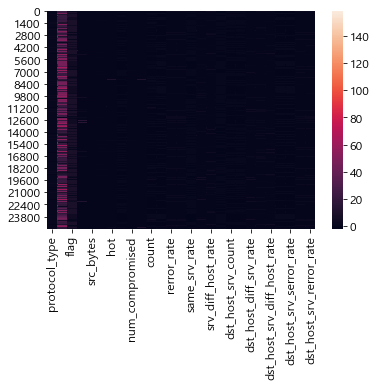

In [99]:
sns.heatmap(X_train4)
plt.show()

In [100]:
X_train4

,protocol_type,service,flag,duration,src_bytes,dst_bytes,hot,logged_in,num_compromised,is_guest_login,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,1,19,9,-0.113551,-0.009889,-0.039310,-0.091933,-0.807626,-0.021873,-0.09599,...,-0.328634,-0.813985,-0.779157,-0.280673,0.073120,-0.287993,-0.641804,-0.627365,-0.221668,-0.374281
1,2,41,9,-0.113551,-0.010032,-0.039310,-0.091933,-0.807626,-0.021873,-0.09599,...,0.732059,-1.030895,-1.157831,2.764403,2.375620,-0.287993,-0.641804,-0.627365,-0.385140,-0.374281
2,1,46,5,-0.113551,-0.010093,-0.039310,-0.091933,-0.807626,-0.021873,-0.09599,...,0.732059,-0.804947,-0.935081,-0.173828,-0.478183,-0.287993,1.603834,1.614454,-0.385140,-0.374281
3,1,22,9,-0.113551,-0.009996,0.052473,-0.091933,1.238197,-0.021873,-0.09599,...,-1.540854,1.264742,1.069663,-0.440940,-0.380894,0.073759,-0.574435,-0.604947,-0.385140,-0.342768
4,1,22,9,-0.113551,-0.010010,-0.034582,-0.091933,1.238197,-0.021873,-0.09599,...,0.732059,1.264742,1.069663,-0.440940,-0.478183,-0.287993,-0.641804,-0.627365,-0.385140,-0.374281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,1,16,2,-0.113551,-0.010093,-0.039310,-0.091933,-0.807626,-0.021873,-0.09599,...,0.732059,-0.976667,-1.091006,-0.120406,-0.478183,-0.287993,-0.641804,-0.627365,2.884296,2.777041
25188,1,19,9,-0.113551,-0.009954,-0.039310,-0.091933,1.238197,-0.021873,-0.09599,...,-1.833807,-0.687453,1.069663,-0.440940,2.764775,1.339894,-0.641804,-0.627365,-0.385140,-0.374281
25189,1,46,1,-0.113551,-0.010093,-0.039310,-0.091933,-0.807626,-0.021873,-0.09599,...,0.732059,-0.922440,-1.046456,-0.066984,-0.478183,-0.287993,-0.641804,-0.627365,2.884296,2.777041
25190,1,38,5,-0.113551,-0.010093,-0.039310,-0.091933,-0.807626,-0.021873,-0.09599,...,0.732059,-0.859174,-0.979631,-0.120406,-0.478183,-0.287993,1.603834,1.614454,-0.385140,-0.374281


In [101]:
# PCA: 차원 축소
# pca = PCA(n_components=2)
# principalComponents = pca.fit_transform(X_train)
# print(pca.explained_variance_ratio_)
# sum(pca.explained_variance_ratio_)

In [102]:
# pca = PCA(n_components=3)
# principalComponents = pca.fit_transform(X_train)
# print(pca.explained_variance_ratio_)
# sum(pca.explained_variance_ratio_)

In [103]:
# pca = PCA(n_components=4)
# principalComponents = pca.fit_transform(X_train)
# print(pca.explained_variance_ratio_)
# sum(pca.explained_variance_ratio_)

In [104]:
# pca = PCA(n_components=8)
# principalComponents = pca.fit_transform(X_train)
# print(pca.explained_variance_ratio_)
# sum(pca.explained_variance_ratio_)

In [105]:
# principalDF = pd.DataFrame(data=principalComponents)
# principalDF

## Train/Val/Test 분리
- 최종적으로 선정된 모델에 넣어볼 Test data가 따로 존재하기 때문에 그 Test data는 놔두고 Train data 내에서 Train/Val/Test 생성

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
train_x, test_x, train_y, test_y = train_test_split(X_train4, y_train,
                                                    test_size=0.2,
                                                    stratify=y_train,
                                                    random_state=1)

In [108]:
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(20153, 27) (20153,) (5039, 27) (5039,)


In [109]:
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y,
                                                  test_size=0.2,
                                                  stratify=train_y,
                                                  random_state=1)

In [110]:
print(train_x.shape, val_x.shape, train_y.shape, val_y.shape)

(16122, 27) (4031, 27) (16122,) (4031,)


## Evaluating Model

In [153]:
def evaluating_model(model, Xdata,ydata):
    pred = model.predict(Xdata)
    cross_score = cross_val_score(model, Xdata, ydata, scoring='recall', cv=5)
    accuracy = accuracy_score(ydata, pred)
    c_matrix = confusion_matrix(ydata, pred)
    classification = classification_report(ydata, pred, target_names=[enc_dict['class'][0],enc_dict['class'][1]])
    print('=============', model, 'evaluating=============')
    print("Mean Cross_val_score(recall): \n", cross_score.mean())
    print("Accuracy_score: \n", accuracy)
    print("Confusion_matrix: \n", c_matrix)
    print("Classification_report: \n", classification)

## GridSearch

In [159]:
def gridSearch(model, param, num):
    start_time=time.time()
    grid_search = GridSearchCV(model,
                               param_grid=param,
                               scoring='recall',
                               #scoring=['accuracy','precision'], 
                               #refit='accuracy',
                               cv=num,
                               #verbose=1,
                               n_jobs=-1)
    grid_search.fit(X_train, y_train)

    print('걸린시간 :', time.time() - start_time)
    return grid_search.best_estimator_, grid_search.best_params_

In [162]:
import time

## K-Mean
- 비지도학습은 분류/회귀 문제에 사용불가!!

In [207]:
# from sklearn.cluster import KMeans

# km = KMeans(n_clusters=2, max_iter=1000, n_init=20)

In [204]:
# km.fit(train_x, val_x)

KMeans(max_iter=1000, n_clusters=2, n_init=20)

In [113]:
# from sklearn.model_selection import GridSearchCV

In [205]:
# param = {
#     'n_clusters':range(1,5),  
#     'max_iter':range(1,1000),
#     'n_init':range(1,20)
# }


# gs = GridSearchCV(km, 
#                   param_grid=param,
#                   cv=3,
#                   scoring='accuracy',
#                   n_jobs=-1)

# km_best_estimator, km_best_params = gridSearch(km, param,5)

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [136]:
# gs.fit(train_x, train_y)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(n_neighbors=9), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 30),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [176]:
# km.get_params().keys()

dict_keys(['algorithm', 'copy_x', 'init', 'max_iter', 'n_clusters', 'n_init', 'n_jobs', 'precompute_distances', 'random_state', 'tol', 'verbose'])

In [185]:
# km_best_estimator, km_best_params = gridSearch(km, param, 3)

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [139]:
# from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

In [157]:
# pred_train = km.predict(train_x)

In [158]:
# print(classification_report(train_y, pred_train ,target_names=['anomaly', 'normal']))

              precision    recall  f1-score   support

     anomaly       0.72      0.56      0.63      7515
      normal       0.68      0.81      0.74      8607

    accuracy                           0.69     16122
   macro avg       0.70      0.69      0.68     16122
weighted avg       0.70      0.69      0.69     16122



## KNN

In [115]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2)

In [116]:
knn.fit(train_x, train_y)

KNeighborsClassifier(n_neighbors=2)

In [117]:
k_list = range(1, 10)
train_acc_list = []
test_acc_list = []

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_x, train_y)
    
    pred_train = knn.predict(train_x)
    pred_test = knn.predict(test_x)
    
    train_acc_list.append(accuracy_score(train_y, pred_train))
    test_acc_list.append(accuracy_score(test_y, pred_test))

In [118]:
pd.DataFrame(dict(K=k_list,
                  Train=train_acc_list,
                  Test=test_acc_list))

,K,Train,Test
0,1,0.999938,0.994443
1,2,0.997767,0.994642
2,3,0.996526,0.992657
3,4,0.995534,0.991268
4,5,0.994169,0.991467
5,6,0.993239,0.990474
6,7,0.992991,0.991467
7,8,0.992309,0.991467
8,9,0.991068,0.989879


In [119]:
k_list = range(1, 10)
train_acc_list = []
test_acc_list = []

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(val_x, val_y)
    
    pred_train = knn.predict(val_x)
    pred_test = knn.predict(val_x)
    
    train_acc_list.append(accuracy_score(val_y, pred_train))
    test_acc_list.append(accuracy_score(val_y, pred_test))

In [120]:
pd.DataFrame(dict(K=k_list,
                  Train=train_acc_list,
                  Test=test_acc_list))

,K,Train,Test
0,1,1.000000,1.000000
1,2,0.997023,0.997023
2,3,0.994294,0.994294
3,4,0.992062,0.992062
4,5,0.992558,0.992558
5,6,0.991069,0.991069
6,7,0.991069,0.991069
7,8,0.987596,0.987596
8,9,0.986852,0.986852


In [188]:
# GridSearch
param = {
    'n_neighbors':range(1,30), # default = 5
    'weights':['uniform','distance'], # uniform, distance or callable(user defined), default:uniform
#     'algorithm':['ball_tree', 'kd_tree', 'brute']
}


gs = GridSearchCV(knn, 
                  param_grid=param,
                  cv=3,
                  scoring='accuracy',
                  n_jobs=-1)

knn_best_estimator, knn_best_params = gridSearch(knn, param, 5)

걸린시간 : 1080.3954837322235


In [134]:
gs.fit(train_x, train_y)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(n_neighbors=9), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 30),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [135]:
gs.best_params_

{'n_neighbors': 1, 'weights': 'uniform'}

In [189]:
knn_best_estimator, knn_best_params

(KNeighborsClassifier(weights='distance'),
 {'n_neighbors': 5, 'weights': 'distance'})

In [190]:
evaluating_model(knn_best_estimator, train_x, train_y)

ValueError: query data dimension must match training data dimension

In [191]:
train_x.shape

(16122, 27)

In [192]:
train_y.shape

(16122,)

In [210]:
print(classification_report(train_y, pred_train ,target_names=['anomaly', 'normal']))

              precision    recall  f1-score   support

     anomaly       0.72      0.56      0.63      7515
      normal       0.68      0.81      0.74      8607

    accuracy                           0.69     16122
   macro avg       0.70      0.69      0.68     16122
weighted avg       0.70      0.69      0.69     16122



## LightGBM
- XGB와 유사하지만 XGB의 단점을 보완해 조금 더 빠름
- Parameter가 많아서 복잡함
- 데이터의 양이 적으면 과적합 가능성 UP
- XGBoost와는 다르게 leaf-node based

In [124]:
from lightgbm import LGBMClassifier, plot_importance

lgb = LGBMClassifier(n_estimators=100)
lgb.fit(train_x, train_y)
lgb.fit(test_x, test_y)

LGBMClassifier()

In [125]:
pred_train = lgb.predict(train_x)
pred_test = lgb.predict(test_x)

accuracy_score(train_y, pred_train), accuracy_score(test_y, pred_test)

(0.9949758094529215, 1.0)

In [193]:
# GridSearchCV
param = {
    'n_estimators':[100,200,300,400,500],  #tree개수(default=100)
    'learning_rate':[0.001, 0.005, 0.05, 0.01, 0.1],  #학습률
    'max_depth':range(1,5),
    'subsample':[0.5, 0.7, 1]  #학습시킬 sample의 비율
}


gs = GridSearchCV(lgb, 
                  param_grid=param,
                  cv=3,
                  scoring='accuracy',
                  n_jobs=-1)

lgb_best_estimator, lgb_best_params = gridSearch(lgb, param, 5)

걸린시간 : 516.8420541286469


In [127]:
gs.fit(train_x, train_y)

GridSearchCV(cv=3, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.005, 0.05, 0.01, 0.1],
                         'max_depth': range(1, 5),
                         'n_estimators': [100, 200, 300, 400, 500],
                         'subsample': [0.5, 0.7, 1]},
             scoring='accuracy')

In [151]:
gs.best_params_, gs.best_estimator_

({'n_neighbors': 1, 'weights': 'uniform'}, KNeighborsClassifier(n_neighbors=1))

In [194]:
lgb_best_estimator, lgb_best_params

(LGBMClassifier(max_depth=3, n_estimators=400, subsample=0.5),
 {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 400, 'subsample': 0.5})

In [211]:
pred_train = lgb.predict(train_x)

In [196]:
evaluating_model(lgb_best_estimator, train_x,train_y)

ValueError: Number of features of the model must match the input. Model n_features_ is 41 and input n_features is 27 

In [212]:
print(classification_report(train_y, pred_train ,target_names=['anomaly', 'normal']))

              precision    recall  f1-score   support

     anomaly       1.00      0.99      0.99      7515
      normal       0.99      1.00      1.00      8607

    accuracy                           0.99     16122
   macro avg       1.00      0.99      0.99     16122
weighted avg       0.99      0.99      0.99     16122



In [129]:
# from bayes_opt import BayesianOptimization
# from sklearn.model_selection import cross_val_score

In [132]:
# def lgb_evaluate(                
#                 numLeaves,
#                 maxDepth,
#                 scaleWeight,
#                 minChildWeight,
#                 subsample,
#                 colSam
#                 ):
    
#     clf = lgb(
#         objective = 'binary',
#         metric= 'auc',
#         eval_metric= 'auc',
#         reg_alpha= 0,
#         reg_lambda= 2,
#         bagging_fraction= 0.999,
#         min_split_gain= 0,
#         min_child_samples= 10,
#         subsample_freq= 3,
#         subsample_for_bin= 50000,
#         n_estimators= 9999999,
#         num_leaves= int(numLeaves),
#         max_depth= int(maxDepth),
#         scale_pos_weight= scaleWeight,
#         min_child_weight= minChildWeight,
#         subsample= subsample,
#         colsample_bytree= colSam,
#         verbose =-1
#     )
    
#     scores = cross_val_score(clf, train_x, train_y, cv=5, scoring='roc_auc')
#     print(np.mean(scores))

#     return np.mean(scores)
   
# def bayesOpt(train_x, train_y):
#     lgbBO = BayesianOptimization(lgb_evaluate, {                                                
#                                                 'numLeaves':  (5, 50),
#                                                 'maxDepth': (2, 63),
#                                                 'scaleWeight': (1, 10000),
#                                                 'minChildWeight': (0.01, 70),
#                                                 'subsample': (0.4, 1),                                                
#                                                 'colSam': (0.4, 1)
#                                             })


#     lgbBO.maximize(init_points=5, n_iter=5)

#     print(lgbBO.res['max'])
    

# bayesOpt(train_x, train_y)

|   iter    |  target   |  colSam   | maxDepth  | minChi... | numLeaves | scaleW... | subsample |
-------------------------------------------------------------------------------------------------


TypeError: 'LGBMClassifier' object is not callable

In [ ]:
evaluating_model(km_best_estimator, val_x, val_y)

In [ ]:
evaluating_model(knn_best_estimator, val_x, val_y)

In [ ]:
evaluating_model(lgb_best_estimator, val_x, val_y)

## Test data

In [ ]:
test

In [ ]:
test1 = test.select_dtypes(include=['object'])
test2 = test.select_dtypes(include=['int64', 'float64'])

In [ ]:
test1 = test1[test1.columns].apply(encoding_label)
test1

In [ ]:
scaled_2 = scaler.fit_transform(test2)
scaled_2

In [ ]:
scaled_df2 = pd.DataFrame(scaled_2, columns=test2.columns)
scaled_df2

In [ ]:
X_test = pd.concat([test1, scaled_df2], axis=1)
X_test